In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
X_train = np.array([[1., -1., 2.],
...                 [2., 0., 0.],
...                 [0., 1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [3]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [4]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [5]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [6]:
(X_train - scaler.mean_)/scaler.scale_

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [7]:
X_scaled == (X_train - scaler.mean_)/scaler.scale_

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [8]:
print("mean:", X_scaled.mean(axis=0),", std:",  X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


In [9]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [10]:
X_test = np.array([[-3., -1., 4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [11]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [12]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [13]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [14]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [15]:
max_abs_scaler.scale_

array([2., 1., 2.])

In [16]:
X = [[ 1., -1.,  2.],
...  [ 2.,  0.,  0.],
...  [ 0.,  1., -1.]]

X_normalized = preprocessing.normalize(X, norm = 'l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [17]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [18]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [19]:
try:
    enc.transform([['female', 'from Asia', 'uses Safari']])
except ValueError as ve:
    print(ve)

Found unknown categories ['from Asia'] in column 1 during transform


In [20]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [21]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [22]:
def process_customers():
    '''
        Load the dataset WA_Fn-UseC_-Telco-Customer-Churn.csv provided.
        Perform transformations on it so it is prepared to build a model 
        (scaling the numerical data and the cathegorical features 
        transformed in numerical integer labels.
    '''
    file_contents = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
    if file_contents.empty:
        print('Provided file is empty')
        return None
            
    file_contents['TotalCharges'] = pd.to_numeric(file_contents['TotalCharges'], errors='coerce').fillna(0)

    numeric_replacements = {col: 0 for col in file_contents.select_dtypes(include=[np.number]).columns}
    file_contents.replace(numeric_replacements, inplace=True)

    nums = file_contents.select_dtypes(include=[np.number]).columns
    cats = file_contents.select_dtypes(include=[object]).columns
    
    ordinal_encoder = preprocessing.OrdinalEncoder()
    standard_scaler = preprocessing.StandardScaler() 
    
    file_contents[nums] = standard_scaler.fit_transform(file_contents[nums])
    file_contents[cats] = ordinal_encoder.fit_transform(file_contents[cats])
    return file_contents

In [23]:
print(process_customers())

      customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0         5375.0     0.0      -0.439916      1.0         0.0 -1.277445   
1         3962.0     1.0      -0.439916      0.0         0.0  0.066327   
2         2564.0     1.0      -0.439916      0.0         0.0 -1.236724   
3         5535.0     1.0      -0.439916      0.0         0.0  0.514251   
4         6511.0     0.0      -0.439916      0.0         0.0 -1.236724   
...          ...     ...            ...      ...         ...       ...   
7038      4853.0     1.0      -0.439916      1.0         1.0 -0.340876   
7039      1525.0     0.0      -0.439916      1.0         1.0  1.613701   
7040      3367.0     0.0      -0.439916      1.0         1.0 -0.870241   
7041      5934.0     1.0       2.273159      1.0         0.0 -1.155283   
7042      2226.0     1.0      -0.439916      0.0         0.0  1.369379   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0            1.0   

In [24]:
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [25]:
x_train.shape

(3,)

In [26]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

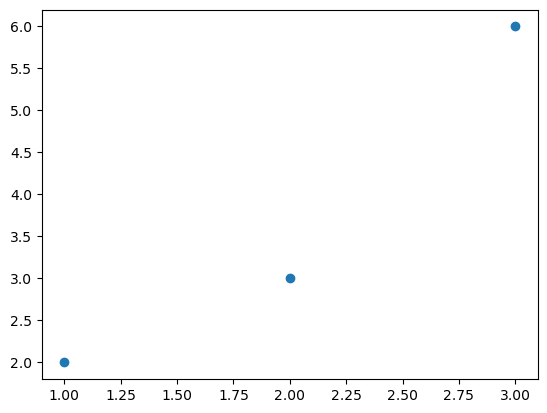

In [27]:
plt.scatter(x_train, y_train)

In [28]:
print(x_train.shape, y_train.shape)

(3, 1) (3,)


In [29]:
def nice_scatterplot(x: np.array, y: np.array, title: str) -> plt.Axes:
    font_size = 18
    figure, axes = plt.subplots(1,1,figsize = (8,5))
    axes.set_xlim(np.min(x) - 1, np.max(x) + 1)
    axes.set_ylim(np.min(y) - 1, np.max(y) + 1)
    axes.tick_params(labelsize=font_size)
    axes.tick_params(labelbottom=False, bottom=False)
    axes.set_xlabel(r'$x$', fontsize=font_size)
    axes.set_ylabel(r'$y$', fontsize=font_size)
    axes.set_title(title, fontsize=font_size)
    axes.grid(True, lw=1.75, ls='--', alpha=0.15)
    axes.scatter(x,y,label=r'$my\,points$')
    axes.legend(loc='best', fontsize=font_size)
    return axes

<Axes: title={'center': 'A nice plot'}, xlabel='$x$', ylabel='$y$'>

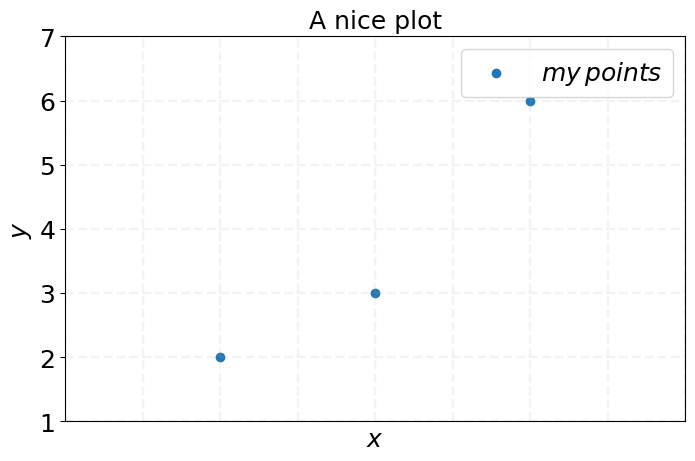

In [30]:
nice_scatterplot(x_train, y_train, 'A nice plot')

In [31]:
xx = np.array([[1,2,3,4],[3,4,6,8]])
print(xx.shape)
xxx= xx.reshape(-1,2)
print(xxx.shape)

(2, 4)
(4, 2)


In [32]:
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)
print(x_train.shape)

(3, 1)


In [33]:
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

In [34]:
aux = x_train - x_bar
numer = np.sum(aux * (y_train - y_bar))
denom = np.sum(aux ** 2)
print(numer.shape, denom.shape)

() ()


In [35]:
a = numer/denom
b = y_bar - a * x_bar
print('The best fit line is {0:3.2f} + {1:3.2f} * x'.format(b,a))
print(f'The best fit is {b}')

The best fit line is -0.33 + 2.00 * x
The best fit is -0.3333333333333335


In [36]:
def simple_linear_regression(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray :
    """
        Inputs:
        x_train: a (num observations by 1) array holding the values of the predictor variable
        y_train: a (num observations by 1) array holding the values of the response variable
    
        Returns:
        beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    if len(x_train.shape) < 2:
        print("Reshaping features array")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array")
        y_train = y_train.reshape(y_train.shape[0], 1)

    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    aux = (x_train - x_bar)

    num = np.sum( (x_train - x_bar) * (y_train - y_bar))
    den = np.sum( (x_train - x_bar) ** 2 )
    a = num/den
    b = y_bar - a * x_bar
    return np.array([b,a])

In [37]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

coeficients = simple_linear_regression(x_train, y_train)

a = coeficients[1]
b = coeficients[0]

print("The best-fit line is {1:8.6f} * x + {0:8.6f}.".format(a, b))

Reshaping features array
Reshaping observations array
The best-fit line is 0.666667 * x + 1.000000.


Text(0, 0.5, '$y$')

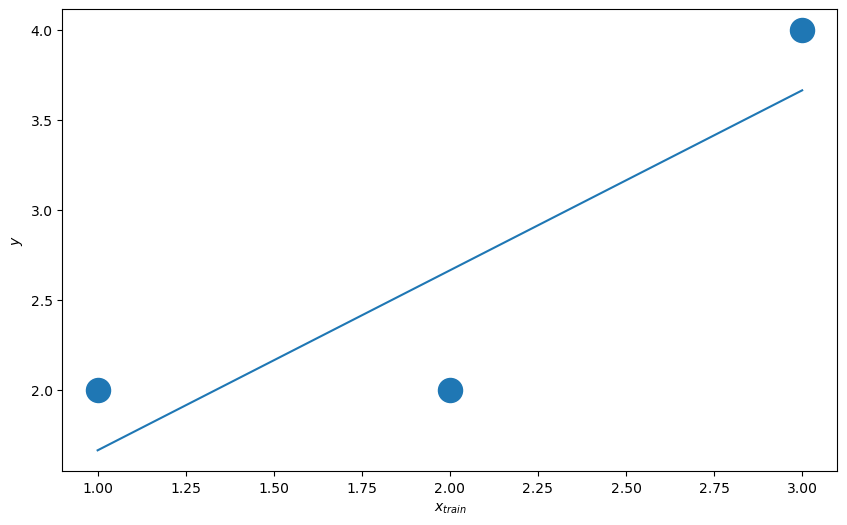

In [38]:
figure_scat , axes_scat = plt.subplots(1,1,figsize=(10,6))
x_train = np.array([[1,2,3]]).T
best_fit = b + a * x_train
axes_scat.scatter(x_train, y_train, s=300, label='Training Data')
axes_scat.plot(x_train, best_fit, ls='-', label='Best fit line')

axes_scat.set_xlabel(r'$x_{train}$')
axes_scat.set_ylabel(r'$y$')

In [39]:
import statsmodels.api as sm

In [40]:
X = sm.add_constant(x_train)
print(X)
toyregr_sm = sm.OLS(y_train,X)
results_sm = toyregr_sm.fit()
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]
print(f'The regression coeff from statsmodels are β_0 = {beta0_sm:8.6f} and β_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coeff from statsmodels are β_0 = 0.666667 and β_1 = 1.000000


In [41]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.333
Time:                        10:20:15   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

In [42]:
from sklearn import linear_model

In [43]:
toyregr = linear_model.LinearRegression()
results = toyregr.fit(x_train, y_train)
beta0_sl = toyregr.intercept_
beta1_sl = toyregr.coef_[0]
print(f'The regression coeff from sklearn are β_0 = {beta0_sl:8.6f} and β_1 = {beta1_sl:8.6f}')

The regression coeff from sklearn are β_0 = 0.666667 and β_1 = 1.000000


In [44]:
import sklearn

In [45]:
# estimator.fit(x_train, y_train)

In [46]:
file_contents = pd.read_csv('Salary_dataset.csv')
file_contents

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [47]:
print(file_contents.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print(file_contents.head())
X = np.array(file_contents['YearsExperience'])
Y = np.array(file_contents['Salary'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0) 

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [49]:
X_train

array([ 5.4,  8. ,  3. ,  5.2,  3.3,  4.6,  8.3,  6.9,  1.4, 10.6,  3.1,
        2.3,  6. ,  6.1,  3.8,  3.3,  9.1,  2.1,  1.2,  7.2,  5. ,  4.1])

In [50]:
Y_train

array([ 83089., 101303.,  56643.,  66030.,  64446.,  61112., 113813.,
        91739.,  46206., 121873.,  60151.,  39892.,  81364.,  93941.,
        57190.,  54446., 105583.,  43526.,  39344.,  98274.,  67939.,
        56958.])

In [51]:
X_train = X_train.reshape(-1, 1)
print(X_train)
X_test = X_test.reshape(-1, 1)
print(X_test)

[[ 5.4]
 [ 8. ]
 [ 3. ]
 [ 5.2]
 [ 3.3]
 [ 4.6]
 [ 8.3]
 [ 6.9]
 [ 1.4]
 [10.6]
 [ 3.1]
 [ 2.3]
 [ 6. ]
 [ 6.1]
 [ 3.8]
 [ 3.3]
 [ 9.1]
 [ 2.1]
 [ 1.2]
 [ 7.2]
 [ 5. ]
 [ 4.1]]
[[ 1.6]
 [10.4]
 [ 4.2]
 [ 4. ]
 [ 9.6]
 [ 8.8]
 [ 9.7]
 [ 4.1]]


In [52]:
lr = LinearRegression().fit(X_train, Y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, Y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, Y_test):.2f}")

Linear Regression-Training set score: 0.94
Linear Regression-Test set score: 0.98


In [53]:
a = lr.coef_[0]
b = lr.intercept_
print(a,"* x + ",b , " = y")

9379.710491946016 * x +  26049.720267542645  = y


In [54]:
lr.predict([[20]])

array([213643.93010646])

In [55]:
a* 20 + b

213643.93010646297

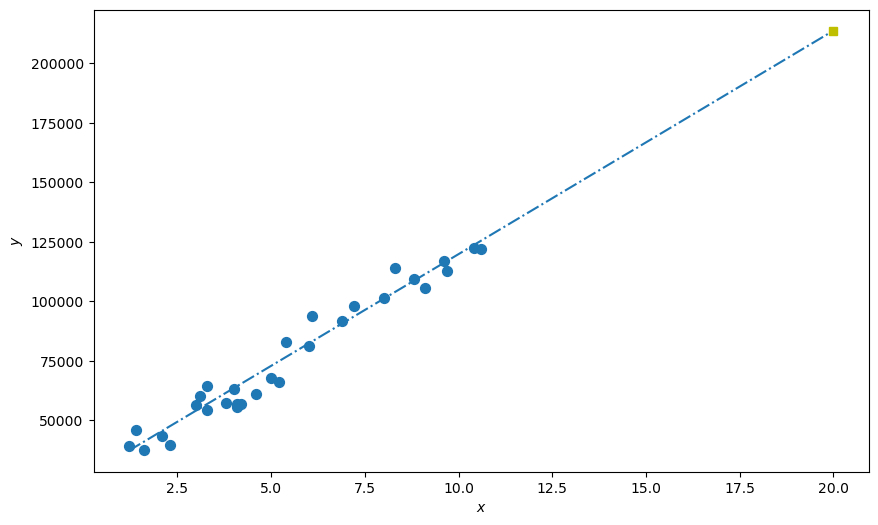

In [56]:
prediction = lr.predict([[20]])
figure_scat, axes_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [20]))

axes_scat.scatter(x, Y, s=50, label='Training Data')
axes_scat.plot(np.append(x,[20]), best_fit, ls='-.', label='Best Fit Line')

axes_scat.plot([20],prediction, "ys", label="LinearRegression")
axes_scat.set_xlabel(r'$x$')
axes_scat.set_ylabel(r'$y$');


In [57]:
file_contents = pd.read_csv('score_updated.csv')
file_contents

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [58]:
X = np.array(file_contents['Hours'])
Y = np.array(file_contents['Scores'])


In [59]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.25, random_state=0)

In [60]:
X_tr

array([4.1, 1.3, 9.2, 8. , 2.6, 1.2, 7.6, 8.6, 5. , 5.8, 7.9, 5.8, 6.1,
       8.4, 2.1, 3. , 5.1, 9.3, 6.7, 9.4, 3.5, 8.9, 1.9, 1.8, 5.3, 1.5,
       2. , 6.4, 2.5, 3.9, 2.3, 2.8, 5.9, 2.2, 6.9, 6.6, 7.7, 9. , 7. ,
       1.7, 9.7, 6.2, 1. , 1.1, 2.9, 7.4, 4.7, 5.7, 6.1, 3.7, 7.5, 2.7,
       9.8, 8.7, 4.9, 4.2, 6.3, 8. , 4.4, 8.2, 5.2, 4.5, 4.3, 7.1, 4.8,
       6. , 2.7, 4.4, 9.6, 5.4, 3.1, 7.3])

In [61]:
X_ts

array([9.5, 4. , 3.2, 4.6, 6.8, 7.2, 2.5, 5.6, 2.4, 1.4, 3.6, 3. , 6.5,
       3.3, 5.5, 1.6, 3.8, 7.8, 8.1, 8.3, 3.7, 3.4, 8.5, 6.8])

In [62]:
Y_tr

array([44, 16, 88, 84, 32, 14, 78, 89, 52, 60, 80, 63, 67, 84, 20, 27, 47,
       94, 71, 93, 30, 95, 24, 21, 56, 20, 18, 64, 21, 38, 23, 29, 62, 22,
       76, 72, 85, 92, 73, 18, 96, 68, 12, 17, 31, 69, 50, 59, 63, 37, 70,
       30, 99, 87, 51, 49, 66, 79, 45, 83, 53, 41, 43, 73, 54, 61, 25, 44,
       98, 55, 28, 77], dtype=int64)

In [63]:
Y_ts

array([90, 40, 27, 48, 74, 72, 30, 57, 26, 15, 36, 34, 65, 42, 60, 19, 35,
       86, 82, 81, 37, 33, 75, 67], dtype=int64)

In [64]:
X_tr = X_tr.reshape(-1,1)

In [65]:
X_ts = X_ts.reshape(-1,1)

In [66]:
X_tr

array([[4.1],
       [1.3],
       [9.2],
       [8. ],
       [2.6],
       [1.2],
       [7.6],
       [8.6],
       [5. ],
       [5.8],
       [7.9],
       [5.8],
       [6.1],
       [8.4],
       [2.1],
       [3. ],
       [5.1],
       [9.3],
       [6.7],
       [9.4],
       [3.5],
       [8.9],
       [1.9],
       [1.8],
       [5.3],
       [1.5],
       [2. ],
       [6.4],
       [2.5],
       [3.9],
       [2.3],
       [2.8],
       [5.9],
       [2.2],
       [6.9],
       [6.6],
       [7.7],
       [9. ],
       [7. ],
       [1.7],
       [9.7],
       [6.2],
       [1. ],
       [1.1],
       [2.9],
       [7.4],
       [4.7],
       [5.7],
       [6.1],
       [3.7],
       [7.5],
       [2.7],
       [9.8],
       [8.7],
       [4.9],
       [4.2],
       [6.3],
       [8. ],
       [4.4],
       [8.2],
       [5.2],
       [4.5],
       [4.3],
       [7.1],
       [4.8],
       [6. ],
       [2.7],
       [4.4],
       [9.6],
       [5.4],
       [3.1],
      

In [67]:
X_ts

array([[9.5],
       [4. ],
       [3.2],
       [4.6],
       [6.8],
       [7.2],
       [2.5],
       [5.6],
       [2.4],
       [1.4],
       [3.6],
       [3. ],
       [6.5],
       [3.3],
       [5.5],
       [1.6],
       [3.8],
       [7.8],
       [8.1],
       [8.3],
       [3.7],
       [3.4],
       [8.5],
       [6.8]])

In [68]:
linear_regression = LinearRegression().fit(X_tr, Y_tr)


In [69]:
print(f"Linear Regression-Training set score: {linear_regression.score(X_tr, Y_tr):.2f}")
print(f"Linear Regression-Test set score: {linear_regression.score(X_ts, Y_ts):.2f}")

Linear Regression-Training set score: 0.99
Linear Regression-Test set score: 0.96


In [70]:
slope = linear_regression.coef_[0]
offset = linear_regression.intercept_
print(f'{slope} * hours_studied + {offset} = test_score (from 100)') # that's an ugly test :(

10.013973783379312 * hours_studied + 1.4392455960044117 = test_score (from 100)


In [71]:
print("For 9 hours studied, the expected score is {0:4.2f}/100".format(linear_regression.predict([[9]])[0]))

For 9 hours studied, the expected score is 91.57/100


In [72]:
print("For 9 hours 30 mins studied, the expected score is {0:4.2f}/100".format(linear_regression.predict([[9.5]])[0]))

For 9 hours 30 mins studied, the expected score is 96.57/100


In [73]:
print("For 0 hours studied, the expected score is {0:4.2f}/100".format(linear_regression.predict([[0]])[0]))

For 0 hours studied, the expected score is 1.44/100


In [74]:
def nice_linregr_visual(x: np.array, y: np.array, slope: float, offset:float, title: str) -> plt.Axes:
    best_fit = offset + slope * x
    font_size = 18
    figure, axes = plt.subplots(1,1,figsize = (8,5))
    axes.set_xlim(np.min(x) - 1, np.max(x) + 1)
    axes.set_ylim(np.min(y) - 1, np.max(y) + 1)
    axes.tick_params(labelsize=font_size)
    axes.set_xlabel('Hours Studied', fontsize=font_size)
    axes.set_ylabel('Test Score (from 100)', fontsize=font_size)
    axes.set_title(title, fontsize=font_size)
    axes.scatter(x,y,label='Students',color='g')
    predict_points = np.array([1,9,9.5])
    axes.scatter(predict_points, np.array([slope * val + offset for val in predict_points]),label='Some predictions', color = 'b', s=100)
    axes.plot(x,best_fit, label='Prediction Model',color='r')
    axes.legend(loc='best', fontsize=font_size)
    return axes

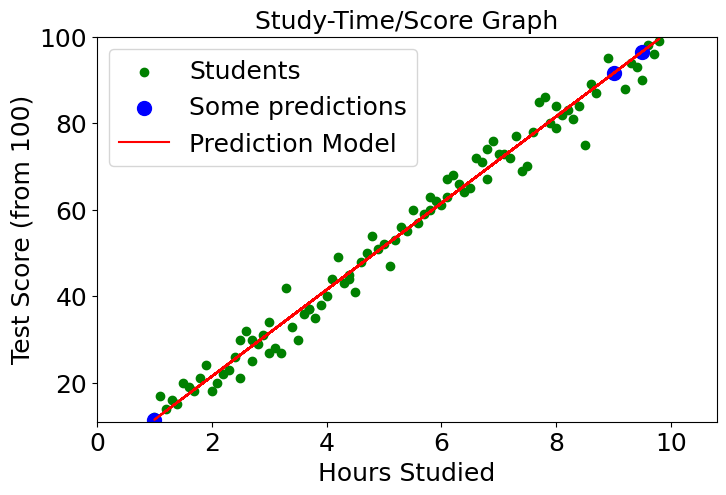

In [75]:
axes = nice_linregr_visual(X,Y, slope, offset, "Study-Time/Score Graph")

In [76]:
file_contents = pd.read_csv('score_updated.csv')
X = np.array(file_contents['Hours'])
Y = np.array(file_contents['Scores'])
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.25, random_state=0)
X_tr = X_tr.reshape(-1, 1)
X_ts = X_ts.reshape(-1, 1)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_tr, Y_tr)

print(f"Ridge Regression-Training set score: {ridge.score(X_tr, Y_tr):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_ts, Y_ts):.2f}")

Ridge Regression-Training set score: 0.99
Ridge Regression-Test set score: 0.97


In [77]:
file_contents = pd.read_csv('score_updated.csv')
X = np.array(file_contents['Hours'])
Y = np.array(file_contents['Scores'])
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.25, random_state=0)
X_tr = X_tr.reshape(-1, 1)
X_ts = X_ts.reshape(-1, 1)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_tr, Y_tr)

print(f"Lasso Regression-Training set score: {lasso.score(X_tr, Y_tr):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_ts, Y_ts):.2f}")

Lasso Regression-Training set score: 0.99
Lasso Regression-Test set score: 0.97


In [78]:
file_contents = pd.read_csv('score_updated.csv')
X = np.array(file_contents['Hours'])
Y = np.array(file_contents['Scores'])
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.25, random_state=0)
X_tr = X_tr.reshape(-1, 1)
X_ts = X_ts.reshape(-1, 1)

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0).fit(X_tr, Y_tr)

print(f"Lasso Regression-Training set score: {elastic_net.score(X_tr, Y_tr):.2f}")
print(f"Lasso Regression-Test set score: {elastic_net.score(X_ts, Y_ts):.2f}")

Lasso Regression-Training set score: 0.98
Lasso Regression-Test set score: 0.97


10.01 * x + 1.44 = y
10.00 * x + 1.52 = y
9.86 * x + 2.27 = y
9.22 * x + 5.69 = y


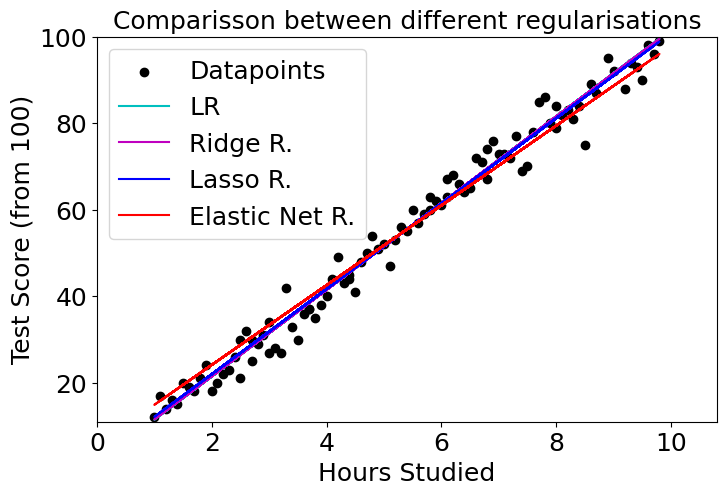

In [79]:
file_contents = pd.read_csv('score_updated.csv')
X = np.array(file_contents['Hours'])
Y = np.array(file_contents['Scores'])
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.25, random_state=0)
X_tr = X_tr.reshape(-1, 1)
X_ts = X_ts.reshape(-1, 1)
c = LinearRegression().fit(X_tr, Y_tr) # classic linear regression
r = Ridge(alpha=0.7).fit(X_tr, Y_tr)
l = Lasso(alpha=1.0).fit(X_tr, Y_tr)
e = ElasticNet(alpha=1.0).fit(X_tr, Y_tr)
slope_c = c.coef_[0]
offset_c = c.intercept_
slope_r = r.coef_[0]
offset_r = r.intercept_
slope_l = l.coef_[0]
offset_l = l.intercept_
slope_e = e.coef_[0]
offset_e = e.intercept_
print(f"{slope_c:.2f} * x + {offset_c:.2f} = y\n"
        + f"{slope_r:.2f} * x + {offset_r:.2f} = y\n"
        + f"{slope_l:.2f} * x + {offset_l:.2f} = y\n"
        + f"{slope_e:.2f} * x + {offset_e:.2f} = y")


best_fit_c = offset_c + slope_c * X
best_fit_r = offset_r + slope_r * X
best_fit_l = offset_l + slope_l * X
best_fit_e = offset_e + slope_e * X
font_size = 18
figure, axes = plt.subplots(1,1,figsize = (8,5))
axes.set_xlim(np.min(X) - 1, np.max(X) + 1)
axes.set_ylim(np.min(Y) - 1, np.max(Y) + 1)
axes.tick_params(labelsize=font_size)
axes.set_xlabel('Hours Studied', fontsize=font_size)
axes.set_ylabel('Test Score (from 100)', fontsize=font_size)
axes.set_title("Comparisson between different regularisations", fontsize=font_size)
axes.scatter(X,Y,label='Datapoints',color='k')
axes.plot(X,best_fit_c, label='LR',color='c')
axes.plot(X,best_fit_r, label='Ridge R.',color='m')
axes.plot(X,best_fit_l, label='Lasso R.',color='b')
axes.plot(X,best_fit_e, label='Elastic Net R.',color='r')
axes.legend(loc='best', fontsize=font_size)